<a href="https://colab.research.google.com/github/rayehaarika597/prediction.using.supervised.ml/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 Batch

Name : Raye Haarika

Task-1:- Prediction Using Supervised Machine Learning Model

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset :- http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs/ day?

Importing libraries required 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Read the csv file of student record and store it into the variable name called student

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student = pd.read_csv(url)
print("Data imported successfully")
student

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Exploratory Data Analysis

In [5]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
student.shape

(25, 2)

In [8]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Visualization on the dataset

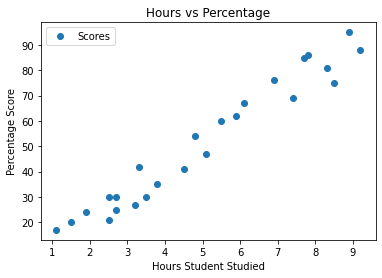

In [9]:
student.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Student Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Hours of student studies is directly proportional to its percentage score from the graph

There is a strong positive relation between the hours of student studied and the percentage score

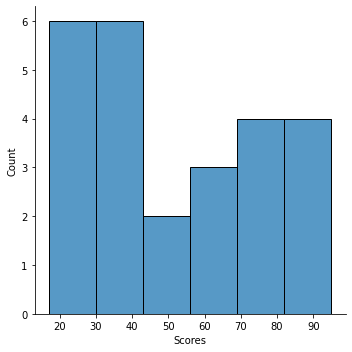

In [10]:
sns.displot(student.Scores)

The above plot shows the count of the scores by each student Here we have 15 student total on the dataset.

The first bar shows the total six students has scores around 20-30.

The second bar shows the total six students has scores around 30-42.

The third bar shows the total two students has scores around 42-57.

The fourth bar shows the total three students has scores around 58-70.

The fifth bar shows the total four students has scores around 71-81.

The sixth bar shows the total four students has scores around 82 and above.

Spliting the dataset as independent variable Hours as X and dependent variable Scores as y

In [13]:
X = student.iloc[:, :-1].values
y = student.iloc[:, 1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Spliting the Dataset into the train dataset and the test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [16]:
X_train.shape

(18, 1)

In [19]:
y_train.shape

(18,)

In [18]:
X_test.shape

(7, 1)

In [20]:
y_test.shape

(7,)

Building the Model using Supervised Learning

In [21]:
from sklearn.linear_model import LinearRegression

student_regressor = LinearRegression()

student_regressor.fit(X_train, y_train) # fitting the linear regression model on to the train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = student_regressor.predict(X_test)

In [26]:
prediction = pd.DataFrame({'Hrs':[i[0] for i in X_test], 'Predicted Marks':[k for k in y_pred]})
prediction

,Hrs,Predicted Marks
0,3.8,40.532064
1,4.8,50.495765
2,2.5,27.579252
3,8.5,87.361461
4,4.5,47.506655
5,7.7,79.390500
6,9.2,94.336052


In [27]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks':y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,35,40.532064
1,54,50.495765
2,21,27.579252
3,75,87.361461
4,41,47.506655
5,85,79.390500
6,88,94.336052


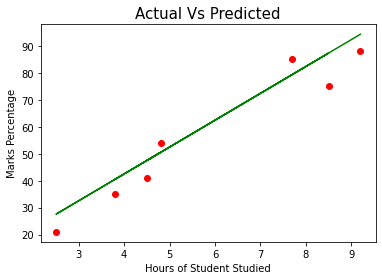

In [28]:
plt.scatter(x=X_test,y=y_test,color='red')
plt.plot(X_test,y_pred,color='green')
plt.title('Actual Vs Predicted',size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours of Student Studied',size=10)
plt.show()

Evaluating the Linear Regression Model

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  6.632745418914277


In [30]:
print('R2 Score is :',r2_score(y_test,y_pred))

R2 Score is : 0.9142138409326498


In [31]:
hrs = [9.25]
answer = student_regressor.predict([hrs])
print("Score = {}".format(round(answer[0],3)))

Score = 94.834
